In [2]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os

In [4]:
data_path = "E:/Datasets/MOT20/train/MOT20-02/img1/"
img_path = os.listdir(data_path)

for i in range(len(img_path)):
    img_path[i] = data_path+img_path[i]

img_path[:100]

['E:/Datasets/MOT20/train/MOT20-02/img1/000001.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000002.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000003.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000004.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000005.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000006.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000007.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000008.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000009.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000010.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000011.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000012.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000013.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000014.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000015.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000016.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000017.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000018.jpg',
 'E:/Datasets/MOT20/train/MOT20-02/img1/000019

In [71]:
# Load a model
model = YOLO("yolov8x.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.track("_1657014482.webp", conf=0.05)  # predict on an image
# results = model.track(img_path[1], conf=0.05)  # predict on an image
# results = model.track("stock-footage-sao-paulo-sp-brazil-may-people-form-a-long-line-to-receive-food-donations-for-lunch.webm", conf=0.05)


image 1/1 c:\Users\QbaSo\Desktop\sem3\ASO\projekt\ultralytics\_1657014482.webp: 384x640 30 persons, 1 bicycle, 2 cars, 2 trucks, 7 umbrellas, 1 handbag, 40.0ms
Speed: 2.0ms preprocess, 40.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


In [62]:
import cv2
import numpy as np
import glob

frameSize = (596,336)

out = cv2.VideoWriter('output_video_x.avi',cv2.VideoWriter_fourcc(*'DIVX'), 30, frameSize)

for r in results:
    out.write(r.plot())

out.release()

In [44]:
results[100].plot().shape

(336, 596, 3)

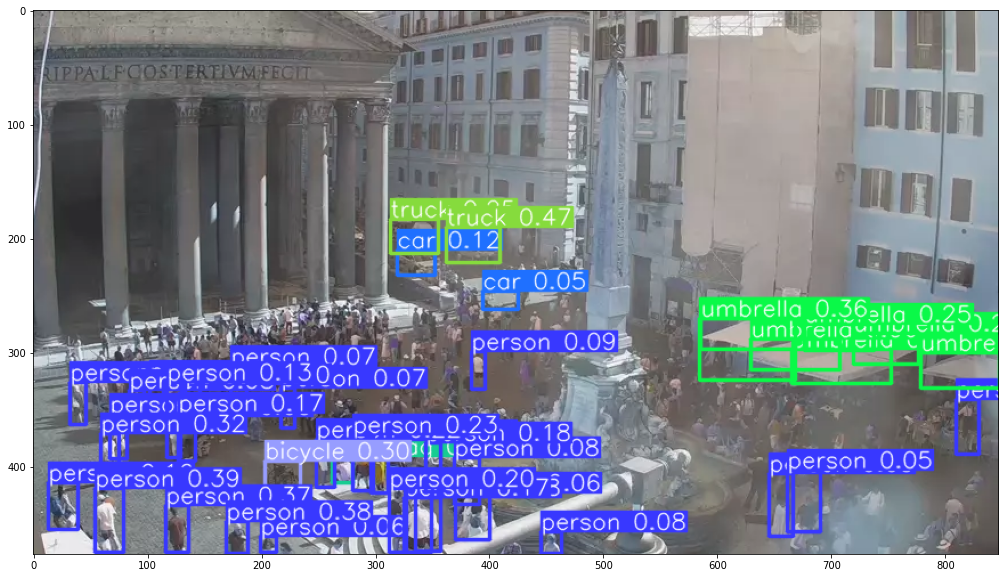

In [72]:
plt.figure(figsize=(20,10))
plt.imshow(results[0].plot())

In [64]:
frames = []

for r in results:
    frames.append({
        int(id) : np.array([float(xywhn[0] + xywhn[2]/2), float(xywhn[2] + xywhn[3]/2)])
        for id, xywhn in zip(r.boxes.id, r.boxes.xywhn)})
        
df = pd.DataFrame(frames)

# calculating velocity [image norm size/frame]
for i in df.columns:
    df[f'v_{i}'] = df[i].diff().pow(2).apply(np.sum).pow(1/2)

Text(0, 0.5, 'velocity')

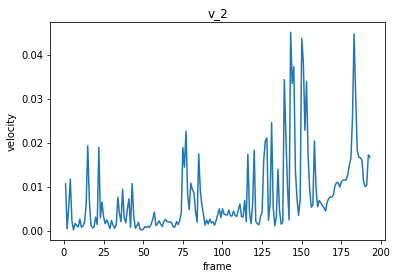

In [95]:
col = 'v_2'
df[col].plot()
plt.title(col)
plt.xlabel('frame')
plt.ylabel('velocity')

# korelacja

Text(0, 0.5, 'velocity')

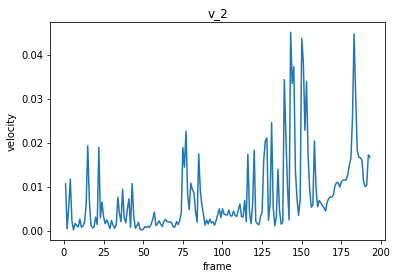

In [74]:
col = 'v_2'
df[col].plot()
plt.title(col)
plt.xlabel('frame')
plt.ylabel('velocity')

Text(0, 0.5, 'velocity')

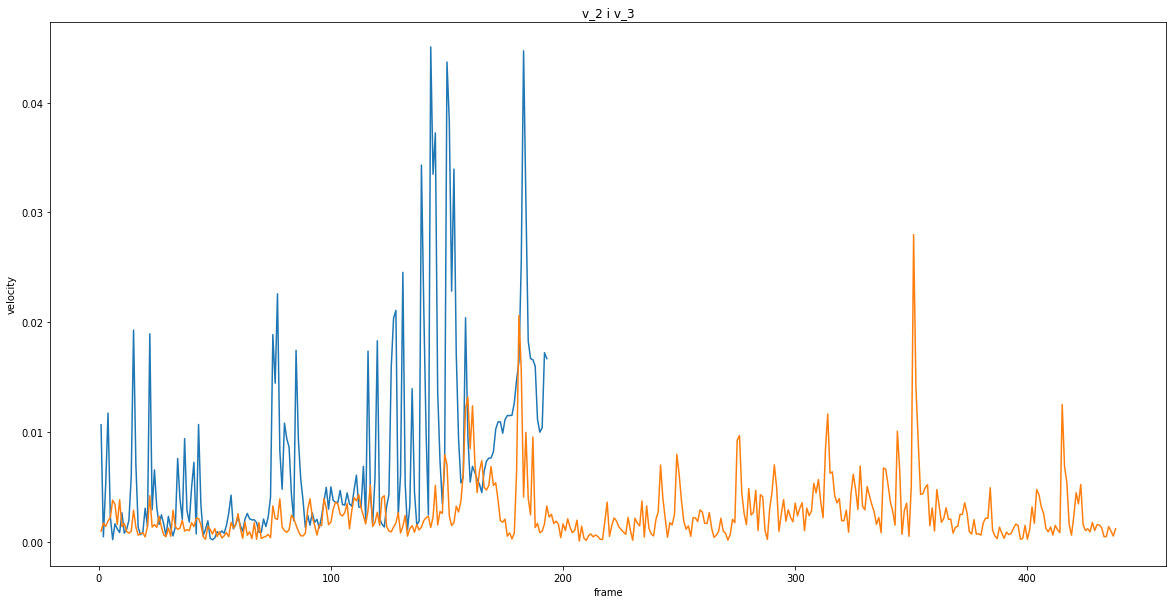

In [92]:
plt.figure(figsize=(20,10))
col = 'v_2'
df[col].plot()
plt.xlabel('frame')
plt.ylabel('velocity')

col = 'v_3'
df[col].plot()
plt.title('v_2 i v_3')
plt.xlabel('frame')
plt.ylabel('velocity')

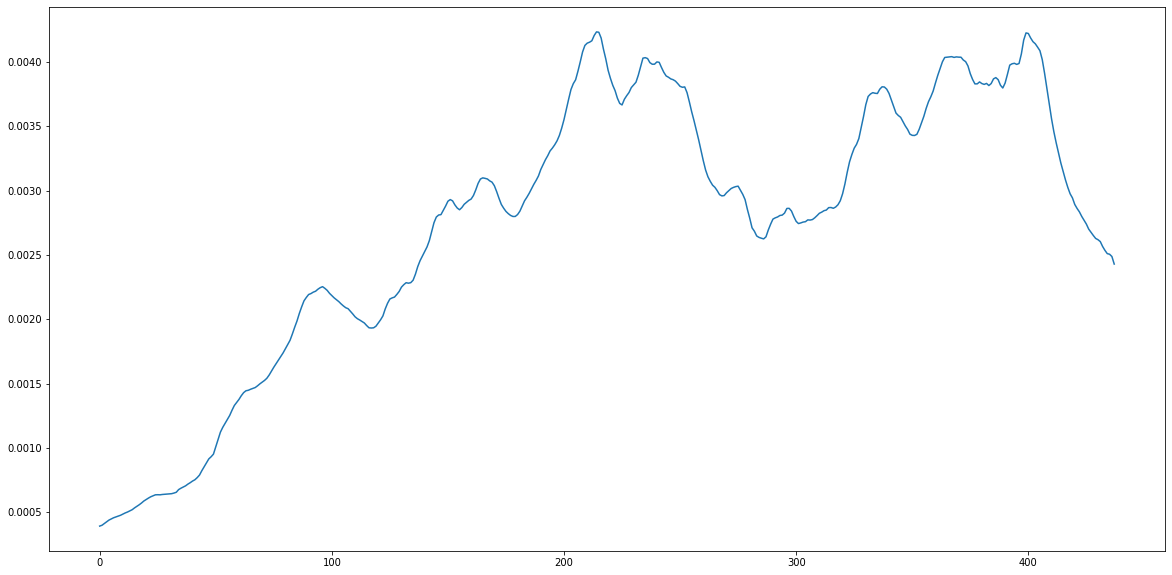

In [93]:
from scipy import ndimage

convolution = np.convolve(ndimage.median_filter(df['v_3'].dropna(), size=10), ndimage.median_filter(df['v_2'].dropna(), size=10), 'same')

plt.figure(figsize=(20,10))
plt.plot(convolution)

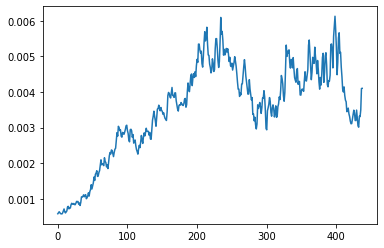

In [89]:
convolution = np.convolve(df['v_3'].dropna(),df['v_2'].dropna(), 'same')

plt.plot(convolution)

# Plot performance

In [22]:
analitics = pd.read_csv("performance.csv")

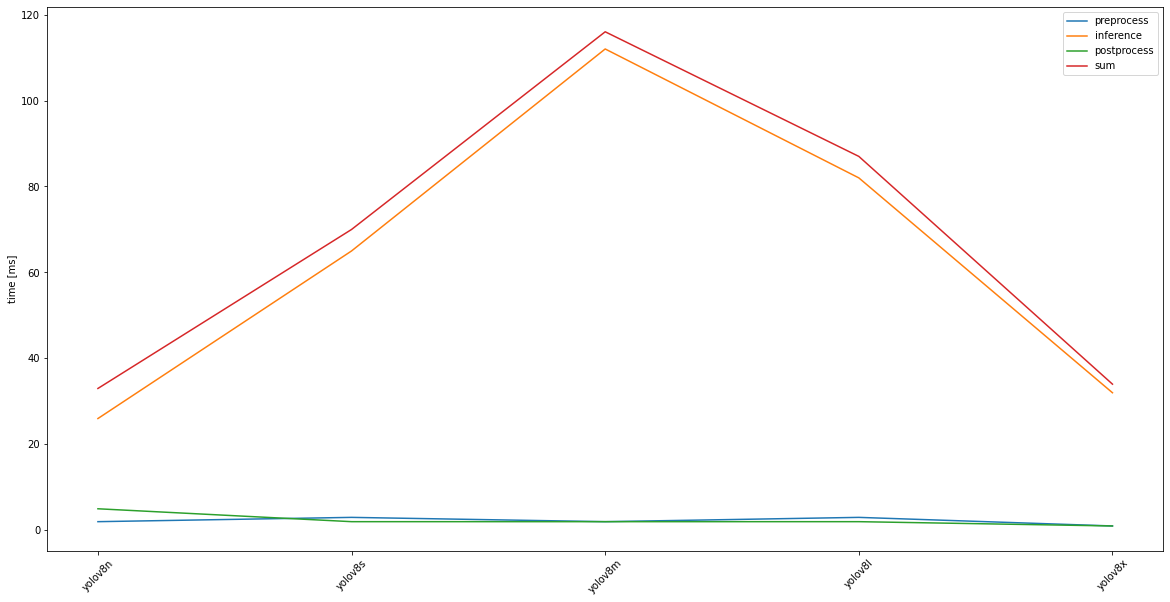

In [99]:
cols = ['preprocess', 'inference', 'postprocess', 'sum']
analitics[cols].plot(figsize=(20,10))
my_xticks = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']
x = np.array([0,1,2,3, 4])
plt.xticks(x, my_xticks, rotation = 45)
plt.ylabel('time [ms]')
plt.show()

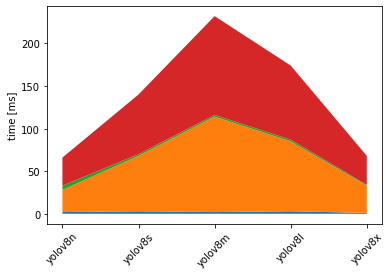

In [108]:
cols = ['preprocess', 'inference', 'postprocess', 'sum']
# analitics[cols].plot(figsize=(20,10))

plt.fill_between(x,[0,0,0,0,0],analitics[cols[0]])
plt.fill_between(x,analitics[cols[0]],analitics[cols[1]]+analitics[cols[0]])
plt.fill_between(x,analitics[cols[1]]+analitics[cols[0]],analitics[cols[2]]+analitics[cols[0]]+analitics[cols[1]])
plt.fill_between(x,analitics[cols[2]]+analitics[cols[0]]+analitics[cols[1]],analitics[cols[3]]+analitics[cols[0]]+analitics[cols[1]]+analitics[cols[2]])

my_xticks = ['yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x']
x = np.array([0,1,2,3, 4])
plt.xticks(x, my_xticks, rotation = 45)
plt.ylabel('time [ms]')
plt.show()